<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Use-pyresample-to-make-a-projected-image" data-toc-modified-id="Use-pyresample-to-make-a-projected-image-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Use pyresample to make a projected image</a></span></li><li><span><a href="#Read-the-lons/lats-from-the-MYD03-file" data-toc-modified-id="Read-the-lons/lats-from-the-MYD03-file-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Read the lons/lats from the MYD03 file</a></span></li><li><span><a href="#get-the-map-projection-from-corners.json" data-toc-modified-id="get-the-map-projection-from-corners.json-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>get the map projection from corners.json</a></span></li><li><span><a href="#Use-pyresample-to-define-a-new-grid-in-this-projection" data-toc-modified-id="Use-pyresample-to-define-a-new-grid-in-this-projection-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Use pyresample to define a new grid in this projection</a></span></li><li><span><a href="#resample-the-longitudes-on-this-grid" data-toc-modified-id="resample-the-longitudes-on-this-grid-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>resample the longitudes on this grid</a></span></li><li><span><a href="#replace-missing-values-with-floating-point-nan" data-toc-modified-id="replace-missing-values-with-floating-point-nan-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>replace missing values with floating point nan</a></span></li><li><span><a href="#Plot-the-image-using-cartopy" data-toc-modified-id="Plot-the-image-using-cartopy-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Plot the image using cartopy</a></span></li><li><span><a href="#use-the-stored-data-to-make-a-new-map" data-toc-modified-id="use-the-stored-data-to-make-a-new-map-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>use the stored data to make a new map</a></span><ul class="toc-item"><li><span><a href="#Thumbnail-for-comparison" data-toc-modified-id="Thumbnail-for-comparison-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Thumbnail for comparison</a></span></li></ul></li></ul></div>

# Use pyresample to make a projected image

In the cartopy_mapping_pyproj notebook we stored projection
coords in a json file called corners.json.  This notebook
reads that information back in to plot lats/lons on a map

In [9]:
import a301
import json
from a301.utils.data_read import download
import a301
import pprint
import shutil
from pyhdf.SD import SD, SDC
import json
import pprint
import cartopy
from pyresample import kd_tree

read_data=False
if read_data:
    filename_M3='MYD03.A2013222.2105.006.2013223155808.hdf'
    download(filename_M3)
    for filename in [filename_M3,filename_M2]:
        local_file = Path.cwd() / Path(filename)
        to_file = a301.data_dir / Path(filename)
        print(f'copy {local_file} to {to_file}')
        shutil.copy(local_file,to_file)

In [10]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy
from pathlib import Path
import pprint
import numpy as np
import pdb
#

# Read the lons/lats from the MYD03 file

**substitute your filename**

In [11]:
# Read the lats and lons from the MYD03 file
filename_M3='MYD03.A2014267.1150.061.2018053164307.hdf'
m3_path= a301.data_dir / Path(filename_M3)
print(f'reading {m3_path}')
m3_file = SD(str(m3_path), SDC.READ)
lats = m3_file.select('Latitude').get()
lons = m3_file.select('Longitude').get()

reading C:\Users\Pearl\Desktop\ATSC 301\a301_code\data\MYD03.A2014267.1150.061.2018053164307.hdf


# get the map projection from corners.json

Get the map  projection and extent from corners.json

In [12]:
json_file = a301.data_dir / Path('corners.json')
with open(json_file,'r') as f:
    map_dict=json.load(f)
pprint.pprint(map_dict)

{'extent': [-1282914.5362594824,
            1594357.0124977762,
            -1184298.2173532906,
            1321944.6218576564],
 'lats': [36.7342066448015,
          33.10612632173573,
          49.786480607344856,
          55.03243276619757,
          36.7342066448015],
 'lons': [33.773003241067,
          8.2070984590893,
          -2.192818758345621,
          31.822044209132205,
          33.773003241067],
 'proj4_params': {'datum': 'WGS84',
                  'ellps': 'WGS84',
                  'lat_0': 44.06927955017845,
                  'lon_0': 15.790092241360691,
                  'proj': 'laea',
                  'x_0': 0.0,
                  'y_0': 0.0},
 'proj4_string': '+datum=WGS84 +ellps=WGS84 +proj=laea '
                 '+lon_0=15.79009224136069 +lat_0=44.06927955017845 +x_0=0.0 '
                 '+y_0=0.0 +no_defs',
 'xcoords': [1594357.0124977762,
             -709776.3533443203,
             -1282914.5362594824,
             1020821.6038552185,
             15

# Use pyresample to define a new grid in this projection

In [13]:
from pyresample import load_area, save_quicklook, SwathDefinition
proj_params = map_dict['proj4_params']
swath_def = SwathDefinition(lons, lats)
area_def=swath_def.compute_optimal_bb_area(proj_dict=proj_params)

# resample the longitudes on this grid

In [25]:
"""
Obtain Channel 30 and it's radiances and use that instead of lons.ravel()
"""

cur_dir=Path.cwd()
#move up one one folder and down to data
data_dir2 = cur_dir.parent / Path('data')
chan30_file=data_dir2 / Path('ch30_out_pa.hdf')
if not chan30_file.is_file():
    print(f"looking for file named {hdf_file}, doesn't exist")
    raise ValueError()
chan_file = SD(str(chan30_file), SDC.READ)
#
# read in radiances in W/m^2/sr/micron and convert to MKS
#
ch30_rads = chan_file.select('ch30').get()*1.e-6

In [26]:
fill_value=-9999.
area_name = 'modis swath 5min granule'
image_lons = kd_tree.resample_nearest(swath_def, ch30_rads,
                                  area_def, radius_of_influence=5000, 
                                      nprocs=2,fill_value=fill_value)
print(f'\ndump area definition:\n{area_def}\n')
print((f'\nx and y pixel dimensions in meters:'
       f'\n{area_def.pixel_size_x}\n{area_def.pixel_size_y}\n'))


dump area definition:
Area ID: laea_otf
Description: On-the-fly laea area
Projection: {'datum': 'WGS84', 'ellps': 'WGS84', 'lat_0': '44.06927955017845', 'lon_0': '15.790092241360691', 'proj': 'laea', 'x_0': '0.0', 'y_0': '0.0'}
Number of columns: 1489
Number of rows: 2233
Area extent: (-1264819.272413685, -1183374.832991477, 1563143.3917710609, 1288009.1408023185)


x and y pixel dimensions in meters:
1899.2361747379086
1106.7550263295097



# replace missing values with floating point nan

In [27]:
nan_value = np.array([np.nan],dtype=np.float32)[0]
image_lons[image_lons< -9000]=nan_value

# Plot the image using cartopy

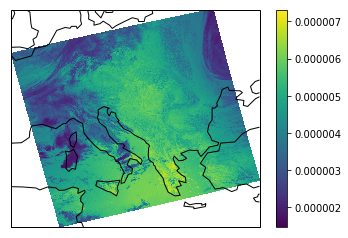

In [28]:
crs = area_def.to_cartopy_crs()
ax = plt.axes(projection=crs)
ax.coastlines()
ax.set_global()
plt.imshow(image_lons, transform=crs, extent=crs.bounds, origin='upper')
plt.colorbar();